In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
filepath = "datasetTexto(in).csv"
df = pd.read_csv(filepath)
df.head(300)

,ID,Categoria,Titulo,Medio,Fecha,Resumen,Comentario_Reaccion,Unnamed: 7
0,1,Generacion Z,Gen Z-styled protests spread in Mexico,Reuters,11/16/2025,Protestas tras asesinato de alcalde; enfrentam...,"Jóvenes exigen seguridad, no sólo retórica pol...",NaN
1,2,Frankenstein,Frankenstein ya en streaming,Netflix Tudum,11/7/2025,La película se estrena en Netflix; estructura ...,La versión de Del Toro es increíblemente emoti...,NaN
2,3,Generacion Z,Sheinbaum desautoriza marcha de la generación Z,El País,11/17/2025,Gobierno señala baja participación juvenil y p...,"Dicen que somos pocos, pero el ruido que hacem...",NaN
3,4,Frankenstein,Del Toro visita CDMX por estreno,Milenio,10/30/2025,Del Toro y elenco asistirán a evento en Ciudad...,"Necesito ir a la alfombra roja, GDT es un ídol...",NaN
4,5,Generacion Z,Gobierno vincula marcha con desinformación,El País,11/13/2025,Acusan campaña digital financiada con bots e i...,Siempre es más fácil culpar a los bots que esc...,NaN
...,...,...,...,...,...,...,...,...
195,196,Frankenstein,"Del Toro: ""Es una tragedia sobre la paternidad...",Focus Features,11/5/2025,El director se enfoca en la responsabilidad de...,Un tema universal que Del Toro maneja con maes...,NaN
196,197,Generacion Z,Las 'Fake News' sobre la marcha: Desmentidos d...,VerificadorMx,11/15/2025,Jóvenes usan sus redes para desmentir rumores ...,La Gen Z lucha contra la desinformación en tie...,NaN
197,198,Frankenstein,Frankenstein se proyecta en la Cineteca Nacional,Cineteca Agenda,10/28/2025,Función especial con presencia de críticos.,Un evento cultural imperdible en la Cineteca.,NaN
198,199,Generacion Z,Impacto en la cultura pop: Músicos se unen a l...,Rolling Stone MX,11/17/2025,Bandas de rock y rap se pronuncian y donan fon...,Los artistas son aliados del cambio.,NaN


In [2]:
df.describe

<bound method NDFrame.describe of       ID     Categoria                                             Titulo  \
0      1  Generacion Z             Gen Z-styled protests spread in Mexico   
1      2  Frankenstein                       Frankenstein ya en streaming   
2      3  Generacion Z    Sheinbaum desautoriza marcha de la generación Z   
3      4  Frankenstein                   Del Toro visita CDMX por estreno   
4      5  Generacion Z         Gobierno vincula marcha con desinformación   
..   ...           ...                                                ...   
195  196  Frankenstein  Del Toro: "Es una tragedia sobre la paternidad...   
196  197  Generacion Z  Las 'Fake News' sobre la marcha: Desmentidos d...   
197  198  Frankenstein   Frankenstein se proyecta en la Cineteca Nacional   
198  199  Generacion Z  Impacto en la cultura pop: Músicos se unen a l...   
199  200  Frankenstein      La controversia del casting en redes sociales   

                Medio       Fecha  \
0   

In [3]:
categoria_count = df['Categoria'].value_counts()
print(categoria_count)

Categoria
Generacion Z    100
Frankenstein    100
Name: count, dtype: int64


In [4]:
medios = df['Medio'].value_counts().head(5)
print(medios)

Medio
El País          12
Milenio           6
Reuters           4
El Universal      4
El Financiero     4
Name: count, dtype: int64


In [7]:
stop_words = ['el', 'la', 'que', 'en', 'y', 'a', 'los', 'del', 'se', 'un', 'una', 'las', 'por', 'es', 'con', 'para']
def palabras_comun(category_name):
    
    text_data = df[df['Categoria'] == category_name]['Comentario_Reaccion']
    
    all_text = " ".join(text_data.astype(str)).lower()
    
    words = all_text.split()
    
    clean_words = [w for w in words if w not in stop_words and len(w) > 3]
    
    from collections import Counter
    return Counter(clean_words).most_common(5)

print(palabras_comun('Generacion Z'))

print(palabras_comun('Frankenstein'))



[('solo', 5), ('pero', 4), ('está', 4), ('siempre', 3), ('nuestra', 3)]
[('toro', 9), ('monstruo', 6), ('pero', 6), ('cada', 5), ('final', 5)]


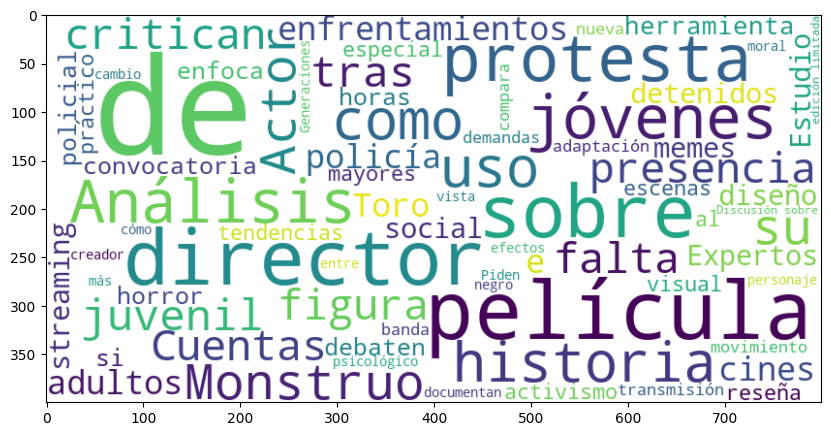

In [8]:

texto_completo = " ".join(df['Resumen'].dropna().astype(str))


wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stop_words, 
    min_font_size=10
).generate(texto_completo)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
